# Machine Learning

*Екатерина Лобачева / Илья Щуров / Сергей Сметанин *

*Совместный бакалавриат НИУ ВШЭ и РЭШ, 2016-17 учебный год*

[Страница курса](http://math-info.hse.ru/2016-17/Machine_Learning)

## Домашнее задание №ML2

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*) и загрузить его на my.NES.

### Задача 1
Рассмотрим линейную регрессию с матрицей признаков $X=(x_i^j)$, $i$ — номер столбца (номер переменной), $i=1,\ldots, m$, $j$ — номер строки (номер наблюдения или объекта), $j=1,\ldots, n$ и вектором ответов $y=(y^1, \ldots, y^n)$. Квадратичная функция потерь записывается в виде

$$Q(w) = \sum_{j=1}^n Q_j(w) = \sum_{j=1}^n ( \langle x^j, w\rangle - y^j)^2,$$

где $w$ — вектор весов, $Q_j(w)$ — потеря на $j$-м объекте, угловыми скобками обозначается стандартное скалярное произведение.

Реализовать алгоритм стохастического градиентного спуска. Он отличается от обычного градиентного спуска тем, что вместо вектора градиента функции $Q$ используется вектор градиента функции $Q_j$, где $j$ на каждом шаге выбирается случайным образом среди всех номеров наблюдений. 

1. Написать функцию `gradient_descent_stochastic`, аналогичную `gradient_descent_simple` из конспекта семинара.   **Подсказка:** Вы можете использовать функцию `randrange` из модуля `random`, чтобы выбирать каждый раз новый элемент.
2. Применить полученную функцию для решения регрессионной задачи на сгенерированных случайных данных, аналогично тому, как это сделано в конспекте семинара.
3. Построить график, показывающий зависимость между номером шага и логарифмом ошибки, для обычного и стохастического градиентного спуска.
4. Сравнить результаты при использовании постоянного шага $\eta_k = \eta$ и убывающего шага $\eta_k = \eta/(1+k/n)$, где $n$ — число наблюдений.



In [402]:
# Впишите решение сюда (при необходимости, создайте дополнительные ячейки ниже этой)

### Задача 2
Рассмотрим линейную регрессию с $L_2$-регуляризатором. Функция потерь при этом записывается в виде

$$Q(w) = \|Xw-y\|^2 + \alpha \|w\|^2,$$

где $\|a\| = \sqrt{a_1^2 + \ldots + a_m^2}$ — стандартная $L_2$-норма вектора, $\alpha$ — некоторая константа. 

1. Найти градиент $\frac{\partial Q(w)}{\partial w}$. Записать его в матричном виде.
2. Реализовать алгоритм градиентного спуска для данной функции потерь.

In [403]:
# Впишите решение сюда (при необходимости, создайте дополнительные ячейки ниже этой)

### Задача 3

Сгенерируем данные следующим образом:

In [399]:
from numpy.random import normal
from random import seed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

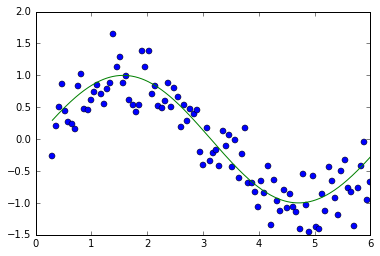

In [400]:
seed(42)
# стартовое состояние генератора случайных чисел: для воспроизводимости

n = 100
# число наблюдений

x_train = np.linspace(0.3, 6, n)
y_train = np.sin(x_train) + normal(scale=0.3, size=n)
x_test = np.linspace(0.3, 6, 300)
y_test = np.sin(x_test)

plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test)

Рассмотрим линейную регрессию
$$y = \beta_1 x + \beta_2 x^2 + \ldots + \beta_d x^d.$$

Будем решать регрессионную задачу для сгенерированных ранее данных тремя различными методами:

1. Без регуляризации: с помощью `LinearRegression()`.
2. С $L_2$-регуляризацией: с помощью `Ridge()`.
3. С $L_1$-регуляризацией: с помощью `Lasso()`.

Пример применения этих функций можно найти [в конспектах Евгения Соколова](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/sem02-linregr.ipynb).

In [401]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

1. Для $d$ равных 1, 2, 5, 10, 30, обучить каждую из трёх указанных выше линейных моделей. **Примечание.** Для каждого значения $d$ вам понадобится сгенерировать матрицы `X_train` и `X_test` с $d$ столбцами, соответствующими степеням $x$. Чтобы регуляризация нормально работала, данные следует нормализовать: например, из каждого столбца вычесть среднее и разделить на стандартное отклонение. (Впрочем, можете попробовать и не делать нормализацию и посмотреть, что получится.)
2. Для каждой из моделей построить графики предсказанных значений $y$, вычисленных по тестовым значениям $x$ (элементы `x_test`), и истинных значений $y$. 
3. Найти среднюю квадратичную ошибку (средний квадрат разности между предсказанными и истинными значениями $y$) для тестовой выборки (для вычисления используйте функцию `mean_squared_error`, импортированную выше). 
4. Какая из моделей сильнее переобучается? 
5. Какой из способов регуляризации позволяет лучше справиться с переобучением? 
6. Попробуйте подобрать такие параметры ($d$, $\alpha$), при которых минимизируется среднеквадратичная ошибка, вычисленная на тестовой выборке.
7. Какой из методов работает быстрее? (Используйте магическую команду `%%timeit`, чтобы определить время выполнения ячейки.) Как изменится соотношение времени работы, если число наблюдений $n$ увеличить в 10 раз? В 100 раз? (Примечание: `LinearRegression` использует явную формулу для вычисления коэффициентов линейной регрессии, через обращение матрицы. `Ridge` и `Lasso` используют итеративные формулы — градиентный спуск и другие.)



In [402]:
# Впишите решение сюда (при необходимости, создайте дополнительные ячейки ниже этой)